In [335]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

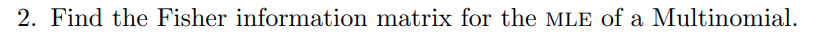

This isn't a computational exercise, but I used np to check my answer

In [85]:
p = np.array([0.1, 0.3, 0.2, 0.2]).reshape(4, 1)
pk = 1 - np.sum(p)

In [90]:
Sigma = - (p @ np.transpose(p))
Sigma = Sigma + np.diag(np.squeeze(p * p + p * (1 - p)))

In [91]:
Sigma

array([[ 0.09, -0.03, -0.02, -0.02],
       [-0.03,  0.21, -0.06, -0.06],
       [-0.02, -0.06,  0.16, -0.04],
       [-0.02, -0.06, -0.04,  0.16]])

In [92]:
I = np.ones((4, 4)) / pk
I = I + np.diag(np.squeeze(1 / p))

In [93]:
I 

array([[15.        ,  5.        ,  5.        ,  5.        ],
       [ 5.        ,  8.33333333,  5.        ,  5.        ],
       [ 5.        ,  5.        , 10.        ,  5.        ],
       [ 5.        ,  5.        ,  5.        , 10.        ]])

In [101]:
print(Sigma)
print(np.linalg.inv(I))

[[ 0.09 -0.03 -0.02 -0.02]
 [-0.03  0.21 -0.06 -0.06]
 [-0.02 -0.06  0.16 -0.04]
 [-0.02 -0.06 -0.04  0.16]]
[[ 0.09 -0.03 -0.02 -0.02]
 [-0.03  0.21 -0.06 -0.06]
 [-0.02 -0.06  0.16 -0.04]
 [-0.02 -0.06 -0.04  0.16]]


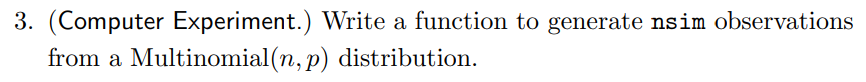

In [103]:
from scipy.stats import multinomial

In [120]:
n = 50
p = np.array([0.1, 0.2, 0.7])

print(multinomial.rvs(n, p))

[ 5 15 30]


In [121]:
_, counts = np.unique(np.random.choice(np.arange(len(p)), p=p, size=n), return_counts=True)
print(counts)

[ 3  8 39]


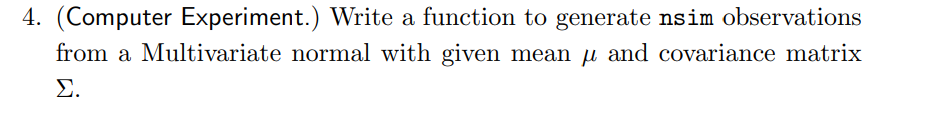

In [160]:
k = 5

mu = np.array([0.2, 0.3, 0.1, 0.4]).reshape(4, 1)
Sigma = - (mu @ np.transpose(mu))
Sigma = (Sigma + np.diag(np.squeeze(mu * mu + mu * (1 - mu))))/1000
mu = np.squeeze(mu)

In [161]:
from scipy.stats import multivariate_normal

In [162]:
nsim = 3
multivariate_normal.rvs(mu, Sigma, nsim)

array([[0.19925514, 0.2923769 , 0.10947168, 0.39889628],
       [0.19805751, 0.32805795, 0.09454849, 0.37933605],
       [0.18811682, 0.28632216, 0.08989755, 0.43566347]])

In [163]:
import scipy

In [164]:
def multinormal_rv(mu, Sigma, nsim):
    Z = np.random.randn(len(mu), nsim)
    return np.transpose(mu.reshape(len(mu), 1) + scipy.linalg.sqrtm(Sigma) @ Z)

In [165]:
multinormal_rv(mu, Sigma, 3)

array([[0.19459549, 0.30651975, 0.10116973, 0.39771503],
       [0.19304219, 0.28693331, 0.10513579, 0.41488871],
       [0.19366943, 0.30035988, 0.11490329, 0.3910674 ]])

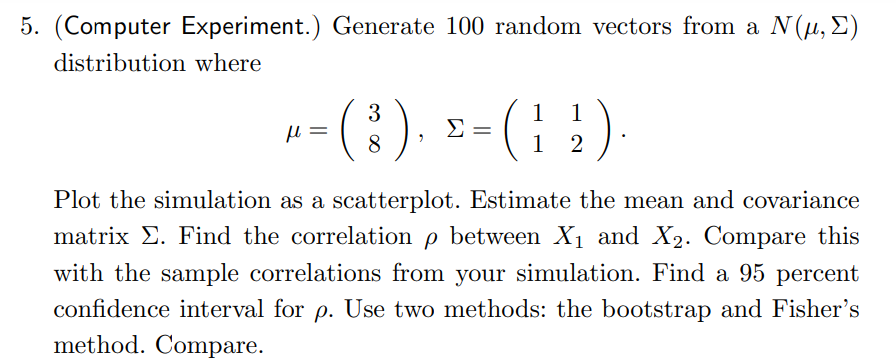

In [321]:
mu = np.array([3, 8])
Sigma = np.array([[1, 1], [1, 2]])
print(Sigma)

[[1 1]
 [1 2]]


In [322]:
nsim = 100
rvs = multivariate_normal.rvs(mu, Sigma, nsim)
print(rvs.shape)

(100, 2)


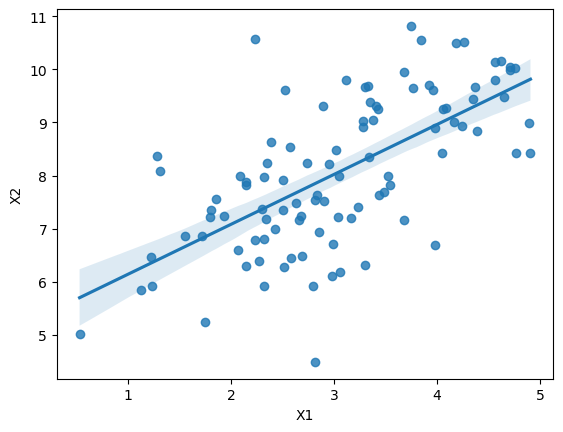

In [344]:
sns.regplot(x=rvs[:, 0], y=rvs[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [323]:
rho = np.sqrt(1/2)
print(rho)

0.7071067811865476


In [324]:
xbars = np.mean(rvs, axis=0)
print(xbars)

[3.05451737 8.07398735]


In [325]:
ss = np.var(rvs, axis = 0, ddof = 1)
print(ss)

[0.97035397 2.02129058]


In [326]:
rhohat = np.sum(np.prod((rvs - xbars), axis=1), axis=0) / ((nsim - 1) * np.sqrt(np.prod(ss)))
print(rhohat)
Sigmahat = np.cov(rvs[:, 0], rvs[:, 1])
print(Sigmahat)

0.651672759634561
[[0.97035397 0.91266004]
 [0.91266004 2.02129058]]


In [327]:
np.corrcoef(rvs[:, 0], rvs[:, 1])

array([[1.        , 0.65167276],
       [0.65167276, 1.        ]])

In [328]:
B = 1000
BootX = multivariate_normal.rvs(xbars, Sigmahat, (nsim, B))

In [329]:
Xbarboot = np.mean(BootX, axis=0)
print(Xbarboot)

[[3.19962944 8.31878267]
 [2.99744837 7.95263784]
 [3.35168763 8.34759131]
 ...
 [3.04489471 7.97486755]
 [2.92154984 8.09178718]
 [3.06419065 7.99366744]]


In [330]:
ssBoot = np.var(BootX, axis = 0, ddof=1)
print(ssBoot.shape)

(1000, 2)


In [331]:
print(BootX.shape)

(100, 1000, 2)


In [332]:
rhohatsBoot = np.sum(np.prod((BootX - Xbarboot), axis=2), axis=0) / ((nsim - 1) * np.sqrt(np.prod(ssBoot, axis = 1)))

In [333]:
se = np.std(rhohatsBoot)
print(se)

0.05910384777030381


In [334]:
alpha = 0.05
Cnormal = (rhohat + se * norm.ppf(alpha / 2), rhohat + se * norm.ppf(1 - alpha / 2))
print(Cnormal)
CBoot = (np.quantile(rhohatsBoot, alpha / 2), np.quantile(rhohatsBoot, 1 - alpha / 2))
print(CBoot)

(0.5358313466570275, 0.7675141726120944)
(0.5161774175155569, 0.7569480438778329)


In [346]:
thetahat = (np.log(1 + rhohat) - np.log(1 - rhohat)) / 2

In [347]:
a, b = (thetahat + norm.ppf(alpha / 2) / np.sqrt(nsim - 3), thetahat + norm.ppf(1 - alpha / 2) / np.sqrt(nsim - 3)) 
print(a, b)

0.5791965400831175 0.9772049231836679


In [350]:
fisherC = (np.tanh(a), np.tanh(b))
print(fisherC)

(0.5220812130565669, 0.7518533901581055)


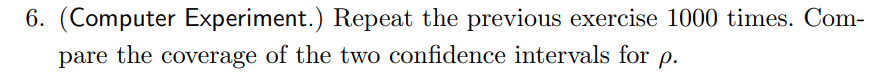

In [445]:
N = 1000
nsim = 100
B = 2500
alpha = 0.05

In [459]:
from tqdm import tqdm

In [466]:
CBoots = np.empty((N, 2))
CnormalBoots = np.empty((N, 2))
CFishers = np.empty((N, 2))

for i in tqdm(range(N)):
    X = multivariate_normal.rvs(mu, Sigma, nsim)
    
    Xbar = np.mean(X, axis=0)
    Xss = np.var(X, axis=0, ddof=1)
    Sigmahat = np.cov(X[:, 0], X[:, 1])
    covhat = np.sum(np.prod(X - Xbar, axis=1), axis=0) / (nsim-1)
    corrhat = covhat / np.sqrt(np.prod(Xss))

    XBoot = multivariate_normal.rvs(Xbar, Sigmahat, (nsim, B))
    XbarBoot = np.mean(XBoot, axis=0)
    XssBoot = np.var(XBoot, axis=0, ddof=1)
    covBoot = np.sum(np.prod(XBoot - Xbar, axis=2), axis=0) / (nsim-1)
    corrBoot = covBoot / np.sqrt(np.prod(XssBoot, axis=1))
    BootC = np.array([np.quantile(corrBoot, alpha/2), np.quantile(corrBoot, 1 - alpha/2)])
    CBoots[i, :] = BootC

    se = np.std(corrBoot, ddof=1)
    Cnormal = (corrhat + se * norm.ppf(alpha / 2), corrhat + se * norm.ppf(1 - alpha / 2))
    CnormalBoots[i, :] = Cnormal

    thetahat = (np.log(1 + corrhat) - np.log(1 - corrhat)) / 2
    a, b = (thetahat + norm.ppf(alpha / 2) / np.sqrt(nsim - 3), thetahat + norm.ppf(1 - alpha / 2) / np.sqrt(nsim - 3))
    FisherC = [np.tanh(a), np.tanh(b)]
    CFishers[i, :] = FisherC

100%|██████████| 1000/1000 [00:35<00:00, 27.79it/s]


In [467]:
BootCmean = np.mean(CBoots, axis=0)
print(BootCmean)

BootCnormal = np.mean(CnormalBoots, axis=0)
print(BootCnormal)

FisherCmean = np.mean(CFishers, axis=0)
print(FisherCmean)

[0.59879578 0.80275489]
[0.60212774 0.80663221]
[0.59030413 0.79097526]


They all converge to roughly (0.6, 0.8)